In [4]:

import random

import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F

from matplotlib.image import imread
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from torch.optim import Adam
from torch.utils.data import TensorDataset, DataLoader
from tqdm import tqdm
import os
from struct import unpack

import matplotlib.pyplot as plt
import numpy as np
from numpy import ndarray
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from sklearn.metrics import classification_report
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
from torchvision.datasets import MNIST
import matplotlib.pyplot as plt
import numpy as np
import random
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
import torch.nn.functional as F

In [5]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = MNIST(root='./data', train=False, transform=transform, download=True)

train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

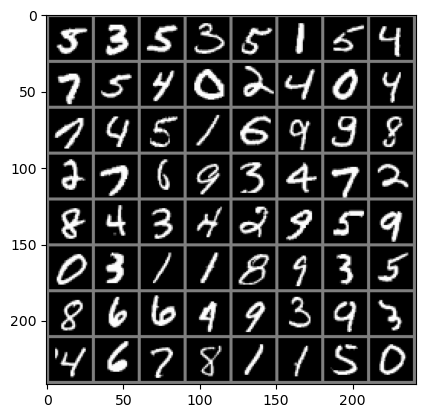

In [6]:
def imshow(img):
    img = img / 2 + 0.5  # unnormalize back to 0-256
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(train_loader)
images, labels = next(dataiter)

# Show images
imshow(torchvision.utils.make_grid(images))

# CNN

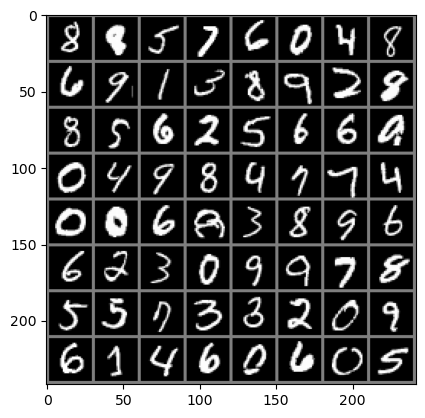

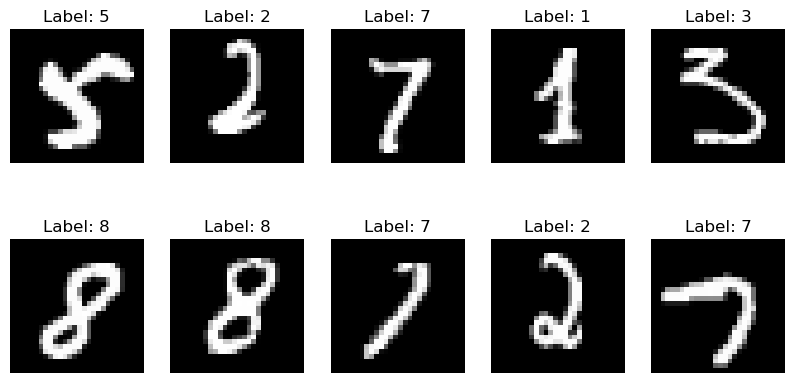

In [7]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = MNIST(root='./data', train=False, transform=transform, download=True)

train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

def imshow(img):
    img = img / 2 + 0.5  # unnormalize back to 0-1 range
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(train_loader)
images, labels = next(dataiter)

# Show images
imshow(torchvision.utils.make_grid(images))

fig, ax = plt.subplots(2, 5, figsize=(10, 5))

for i in range(2):
    for j in range(5):
        idx = random.randint(0, len(train_dataset)-1)
        image, label = train_dataset[idx]
        ax[i, j].imshow(image.squeeze().numpy(), cmap='gray')
        ax[i, j].set_title('Label: {}'.format(int(label)))
        ax[i, j].axis('off')

plt.show()


In [61]:
class ComplexConvNet(nn.Module):
    def __init__(self):
        super(ComplexConvNet, self).__init__()
        
        # Сверточные слои
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        
        # Полносвязанные слои
        self.fc1 = nn.Linear(128 * 3 * 3, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)  
        
    # def forward(self, x):
    #     x = F.relu(self.conv1(x))
    #     x = F.max_pool2d(x, kernel_size=2, stride=2)
    #     x = F.relu(self.conv2(x))
    #     x = F.max_pool2d(x, kernel_size=2, stride=2)
    #     x = F.relu(self.conv3(x))
    #     x = F.max_pool2d(x, kernel_size=2, stride=2)
    #     x = x.view(-1, 128 * 3 * 3)  # При изменении размера последнего сверточного слоя
    #     x = F.relu(self.fc1(x))
    #     x = F.relu(self.fc2(x))
    #     x = self.fc3(x)
    #     return x
    
    # def forward(self, x):
    #     x = F.selu(self.conv1(x))
    #     x = F.max_pool2d(x, kernel_size=2, stride=2)
    #     x = F.selu(self.conv2(x))
    #     x = F.max_pool2d(x, kernel_size=2, stride=2)
    #     x = F.selu(self.conv3(x))
    #     x = F.max_pool2d(x, kernel_size=2, stride=2)
    #     x = x.view(-1, 128 * 3 * 3)  # При изменении размера последнего сверточного слоя
    #     x = F.selu(self.fc1(x))
    #     x = F.selu(self.fc2(x))
    #     x = self.fc3(x)
    #     return x
    
   
    def forward(self, x):
        x = torch.step(self.conv1(x))  # Применяем Step function
        x = F.max_pool2d(x, kernel_size=2, stride=2)
        x = torch.step(self.conv2(x))  # Применяем Step function
        x = F.max_pool2d(x, kernel_size=2, stride=2)
        x = torch.step(self.conv3(x))  # Применяем Step function
        x = F.max_pool2d(x, kernel_size=2, stride=2)
        x = x.view(-1, 128 * 3 * 3)  # При изменении размера последнего сверточного слоя
        x = torch.step(self.fc1(x))  # Применяем Step function
        x = torch.step(self.fc2(x))  # Применяем Step function
        x = self.fc3(x)
        return x

    

    # def forward(self, x):
        # x = F.leaky_relu(self.conv1(x))  # Замена ReLU на Leaky ReLU
        # x = F.max_pool2d(x, kernel_size=2, stride=2)
        # x = F.leaky_relu(self.conv2(x))  # Замена ReLU на Leaky ReLU
        # x = F.max_pool2d(x, kernel_size=2, stride=2)
        # x = F.leaky_relu(self.conv3(x))  # Замена ReLU на Leaky ReLU
        # x = F.max_pool2d(x, kernel_size=2, stride=2)
        # x = x.view(-1, 128 * 3 * 3)
        # x = F.leaky_relu(self.fc1(x))  # Замена ReLU на Leaky ReLU
        # x = F.leaky_relu(self.fc2(x))  # Замена ReLU на Leaky ReLU
        # x = self.fc3(x)
        # return x
    


    # def forward(self, x):
    #     x = F.elu(self.conv1(x))  # Замена ReLU на ELU
    #     x = F.max_pool2d(x, kernel_size=2, stride=2)
    #     x = F.elu(self.conv2(x))  # Замена ReLU на ELU
    #     x = F.max_pool2d(x, kernel_size=2, stride=2)
    #     x = F.elu(self.conv3(x))  # Замена ReLU на ELU
    #     x = F.max_pool2d(x, kernel_size=2, stride=2)
    #     x = x.view(-1, 128 * 3 * 3)
    #     x = F.elu(self.fc1(x))  # Замена ReLU на ELU
    #     x = F.elu(self.fc2(x))  # Замена ReLU на ELU
    #     x = self.fc3(x)
    #     return x




# Tranning


In [62]:

from sklearn.metrics import f1_score


def train_model(model, train_loader, test_loader, criterion, optimizer, num_epochs=100):
    train_f1_values = []
    test_f1_values = []
    train_losses = []
    test_losses = []

    for epoch in range(num_epochs):
        model.train()
        train_preds = []
        train_targets = []
        epoch_train_losses = []

        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            epoch_train_losses.append(loss.item())

            train_preds.extend(torch.argmax(outputs, dim=1).detach().numpy())
            train_targets.extend(labels.numpy())

        train_f1 = f1_score(train_targets, train_preds, average='macro')
        train_f1_values.append(train_f1)
        train_losses.append(sum(epoch_train_losses) / len(epoch_train_losses))

        model.eval()
        test_preds = []
        test_targets = []
        epoch_test_losses = []

        with torch.no_grad():
            for images, labels in test_loader:
                outputs = model(images)
                loss = criterion(outputs, labels)
                epoch_test_losses.append(loss.item())

                test_preds.extend(torch.argmax(outputs, dim=1).detach().numpy())
                test_targets.extend(labels.numpy())

        test_f1 = f1_score(test_targets, test_preds, average='macro')
        test_f1_values.append(test_f1)
        test_losses.append(sum(epoch_test_losses) / len(epoch_test_losses))

        print(f'Epoch: {epoch + 1}, Train F1: {train_f1:.3f}, Test F1: {test_f1:.3f}')

    return train_f1_values, test_f1_values, train_losses, test_losses





# Преобразование данных

In [63]:
# Преобразование данных
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Загрузка данных
train_dataset = MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = MNIST(root='./data', train=False, transform=transform, download=True)


# Dataloader


In [66]:
# Создание DataLoader'ов
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

# Создание и обучение модели
model_complex = ComplexConvNet()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_complex.parameters())

train_f1_values, test_f1_values, train_losses, test_losses = train_model(model_complex, train_loader, test_loader, criterion, optimizer, num_epochs=10)


AttributeError: module 'torch' has no attribute 'step'

# Visualization 

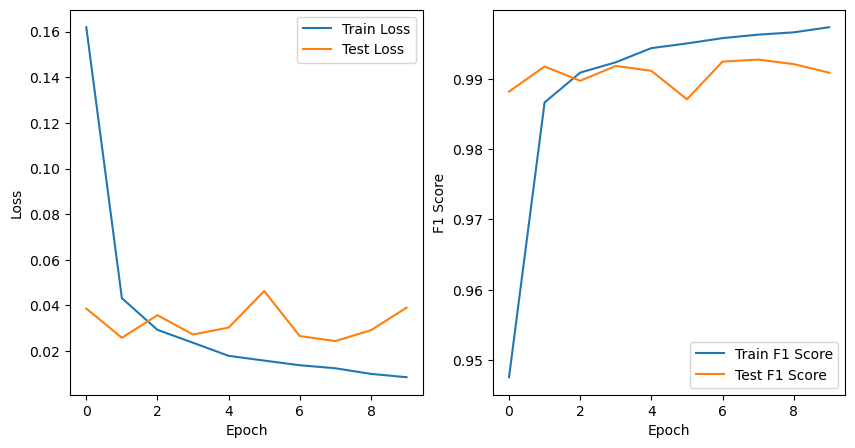

In [59]:
# Визуализация процесса обучения
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_f1_values, label='Train F1 Score')
plt.plot(test_f1_values, label='Test F1 Score')
plt.xlabel('Epoch')
plt.ylabel('F1 Score')
plt.legend()

plt.show()

# Visualization of model prediction


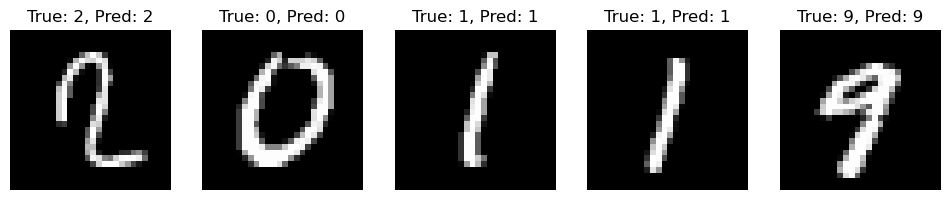

In [13]:
import random

def plot_images_with_predictions(images, labels, predictions):
    """Plots images with their true labels and model's predictions."""
    fig, axes = plt.subplots(1, len(images), figsize=(12, 3))
    for idx, (img, label, pred) in enumerate(zip(images, labels, predictions)):
        axes[idx].imshow(img.squeeze(), cmap='gray')
        axes[idx].set_title(f'True: {label}, Pred: {pred}')
        axes[idx].axis('off')
    plt.show()

num_samples = 5
indices = random.sample(range(len(test_dataset)), num_samples)

sample_images = [test_dataset[i][0] for i in indices]
sample_labels = [test_dataset[i][1] for i in indices]

with torch.no_grad():
    model_complex.eval()
    outputs = model_complex(torch.stack(sample_images))
    predictions = torch.argmax(outputs, dim=1)

plot_images_with_predictions(sample_images, sample_labels, predictions)


# Shap


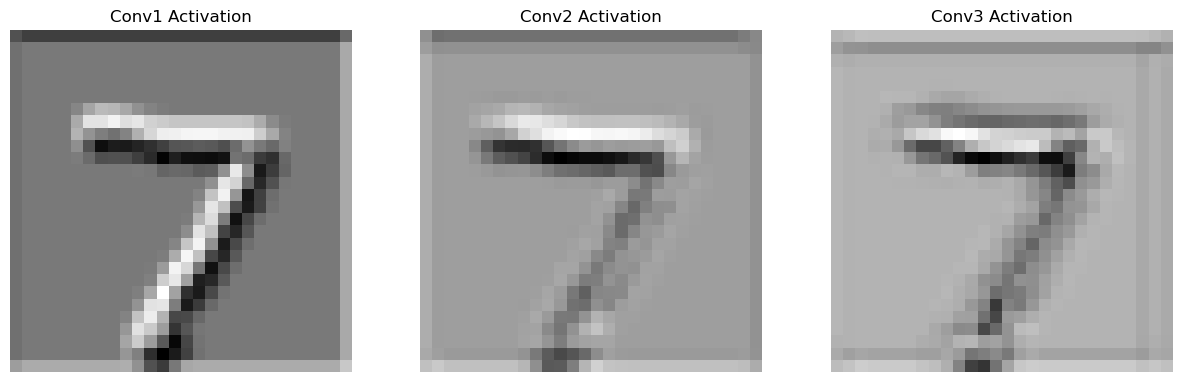

In [60]:
import matplotlib.pyplot as plt
import numpy as np

# Выберем одно изображение из тестового набора
image, _ = test_dataset[0]
image = image.unsqueeze(0)  # Добавляем размерность пакета

# Устанавливаем модель в режим оценки (evaluation mode)
model_complex.eval()

# Получаем активации после каждого сверточного слоя
conv1_activation = model_complex.conv1(image)
conv2_activation = model_complex.conv2(F.relu(model_complex.conv1(image)))
conv3_activation = model_complex.conv3(F.relu(model_complex.conv2(F.relu(model_complex.conv1(image)))))

# Visualize activation maps for each convolutional layer
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Selecting the first channel of each activation map
activation_maps = [conv1_activation[0][0].detach().numpy(),
                   conv2_activation[0][0].detach().numpy(),
                   conv3_activation[0][0].detach().numpy()]

# Displaying each activation map
for i, activation_map in enumerate(activation_maps):
    axs[i].imshow(activation_map, cmap='gray')
    axs[i].set_title(f'Conv{i+1} Activation')
    axs[i].axis('off')

plt.show()


